In [8]:
import pandas as pd

# Load the dataset
f = 'Car details v3.csv'
car_data = pd.read_csv(f)

# Display the first few rows of the dataset and its summary information
print(car_data.info())
print(car_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid

In [9]:
# Handling missing values
# Checking the percentage of missing data in each column
missing_data_percentage = car_data.isnull().sum() / len(car_data) * 100

# Filling missing values
# For continuous variables, use median (to avoid impact of outliers)
# For categorical variables, use mode (most common value)
fill_values = {
    'mileage': car_data['mileage'].mode()[0],
    'engine': car_data['engine'].mode()[0],
    'max_power': car_data['max_power'].mode()[0],
    'torque': car_data['torque'].mode()[0],
    'seats': car_data['seats'].median()
}

car_data_filled = car_data.fillna(fill_values)

# Verifying missing values after filling
missing_data_filled_percentage = car_data_filled.isnull().sum() / len(car_data_filled) * 100
missing_data_percentage, missing_data_filled_percentage

(name             0.000000
 year             0.000000
 selling_price    0.000000
 km_driven        0.000000
 fuel             0.000000
 seller_type      0.000000
 transmission     0.000000
 owner            0.000000
 mileage          2.718996
 engine           2.718996
 max_power        2.645177
 torque           2.731299
 seats            2.718996
 dtype: float64,
 name             0.0
 year             0.0
 selling_price    0.0
 km_driven        0.0
 fuel             0.0
 seller_type      0.0
 transmission     0.0
 owner            0.0
 mileage          0.0
 engine           0.0
 max_power        0.0
 torque           0.0
 seats            0.0
 dtype: float64)

In [10]:
# Convert engine capacity from CC to liters (1000 CC = 1 liter)
car_data_filled['engine'] = car_data_filled['engine'].str.replace(' CC', '').astype(float) / 1000

# Extract numeric values from 'mileage' and 'max_power'
import re

def extract_number(text):
    # Use regex to find numbers in the text, extract the first occurrence
    numbers = re.findall(r'\d+\.\d+|\d+', text)
    return float(numbers[0]) if numbers else None

car_data_filled['mileage'] = car_data_filled['mileage'].apply(lambda x: extract_number(x.split(' ')[0]))
car_data_filled['max_power'] = car_data_filled['max_power'].apply(extract_number)

# Confirm the conversions with a sample of the data
car_data_filled[['engine', 'mileage', 'max_power']].head()

,engine,mileage,max_power
0,1.248,23.40,74.00
1,1.498,21.14,103.52
2,1.497,17.70,78.00
3,1.396,23.00,90.00
4,1.298,16.10,88.20


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Applying label encoding to categorical columns
for column in categorical_columns:
    car_data_filled[column] = label_encoder.fit_transform(car_data_filled[column])

# Confirm the encodings and display the data types to ensure everything is ready for analysis
car_data_filled[categorical_columns].head(), car_data_filled.dtypes

(   fuel  seller_type  transmission  owner
 0     1            1             1      0
 1     1            1             1      2
 2     3            1             1      4
 3     1            1             1      0
 4     3            1             1      0,
 name              object
 year               int64
 selling_price      int64
 km_driven          int64
 fuel               int64
 seller_type        int64
 transmission       int64
 owner              int64
 mileage          float64
 engine           float64
 max_power        float64
 torque            object
 seats            float64
 dtype: object)

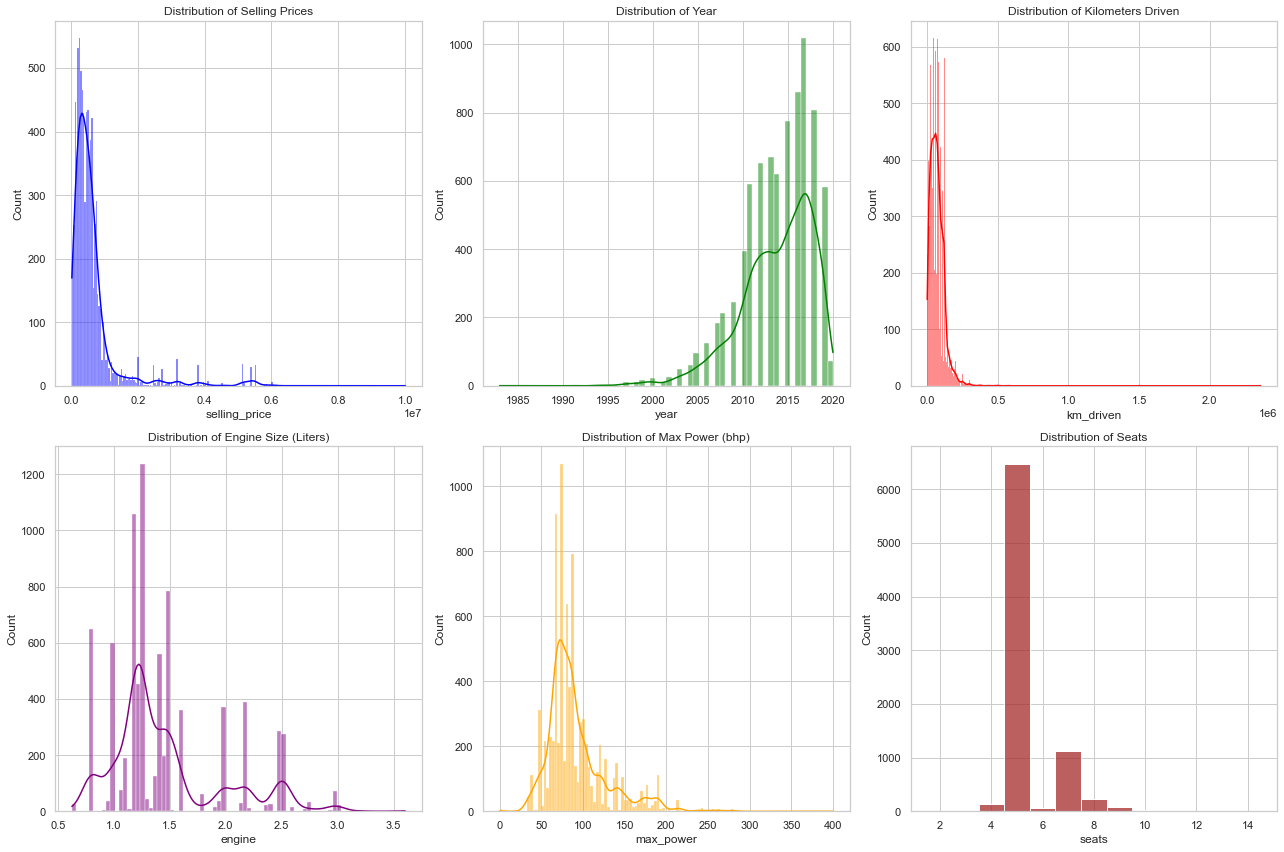

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for histograms of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the distributions
sns.histplot(data=car_data_filled, x='selling_price', kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Selling Prices')

sns.histplot(data=car_data_filled, x='year', kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Year')

sns.histplot(data=car_data_filled, x='km_driven', kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title('Distribution of Kilometers Driven')

sns.histplot(data=car_data_filled, x='engine', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Engine Size (Liters)')

sns.histplot(data=car_data_filled, x='max_power', kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Max Power (bhp)')

sns.histplot(data=car_data_filled, x='seats', kde=False, discrete=True, ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Distribution of Seats')

plt.tight_layout()
plt.show()


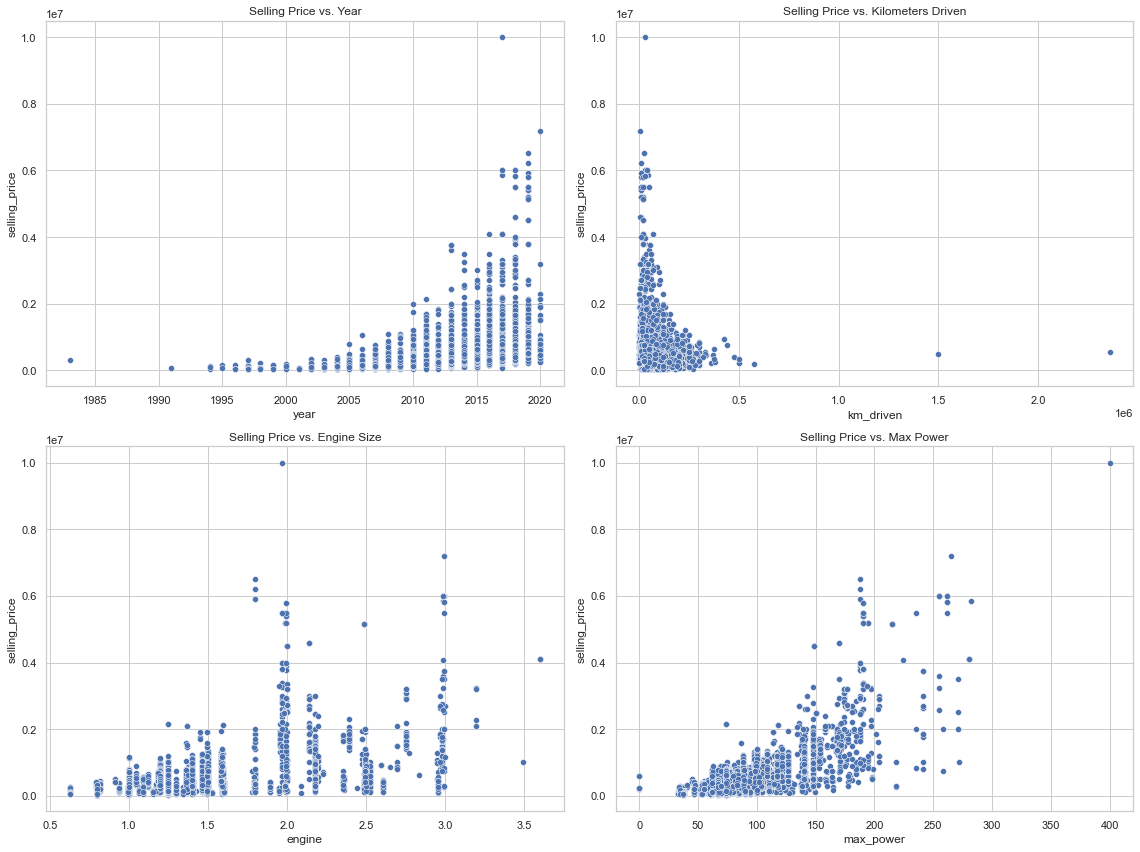

In [13]:
# Creating subplots for scatter plots to examine relationships with selling price
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Relationship between selling price and year
sns.scatterplot(data=car_data_filled, x='year', y='selling_price', ax=axes[0, 0])
axes[0, 0].set_title('Selling Price vs. Year')

# Relationship between selling price and kilometers driven
sns.scatterplot(data=car_data_filled, x='km_driven', y='selling_price', ax=axes[0, 1])
axes[0, 1].set_title('Selling Price vs. Kilometers Driven')

# Relationship between selling price and engine size
sns.scatterplot(data=car_data_filled, x='engine', y='selling_price', ax=axes[1, 0])
axes[1, 0].set_title('Selling Price vs. Engine Size')

# Relationship between selling price and max power
sns.scatterplot(data=car_data_filled, x='max_power', y='selling_price', ax=axes[1, 1])
axes[1, 1].set_title('Selling Price vs. Max Power')

plt.tight_layout()
plt.show()

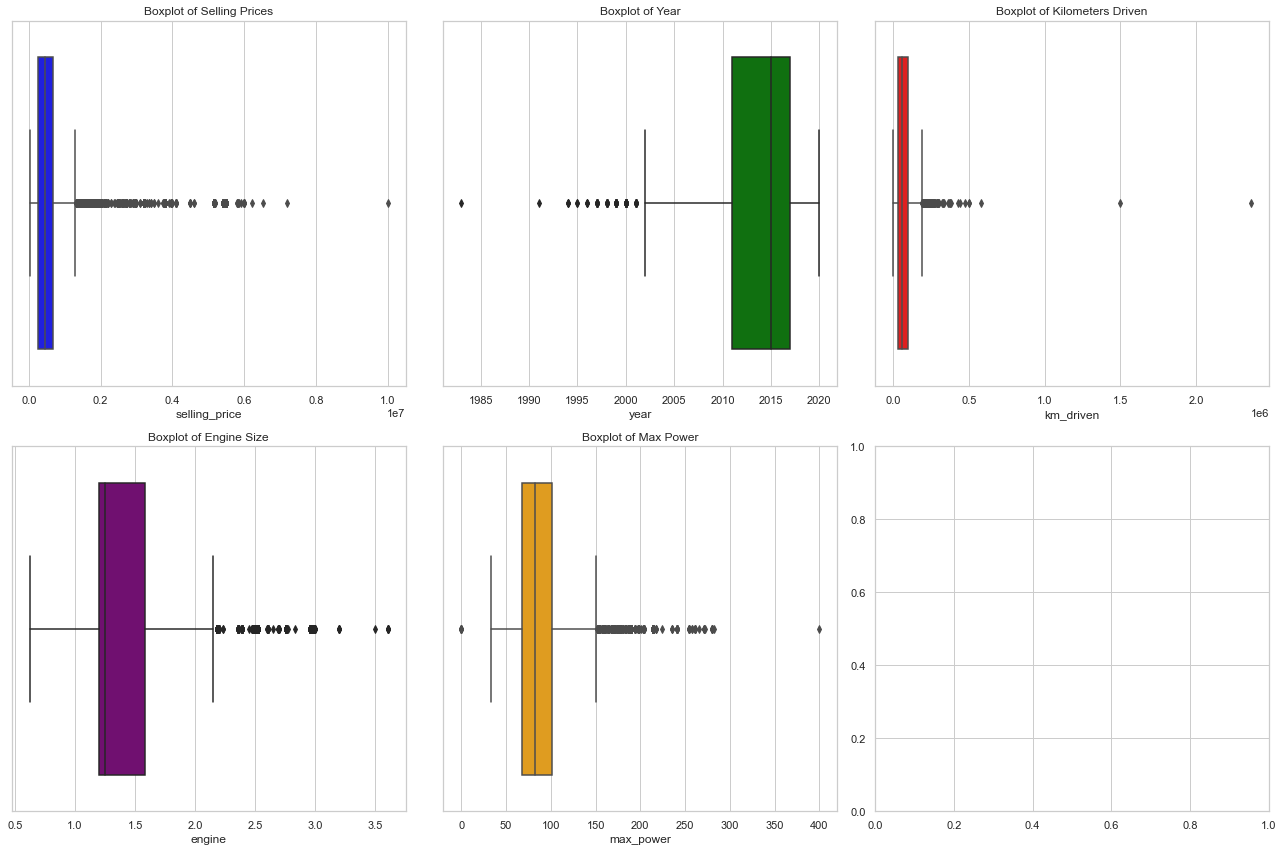

In [14]:
# Creating boxplots to visually inspect outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot for selling price
sns.boxplot(data=car_data_filled, x='selling_price', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Boxplot of Selling Prices')

# Boxplot for year
sns.boxplot(data=car_data_filled, x='year', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Boxplot of Year')

# Boxplot for kilometers driven
sns.boxplot(data=car_data_filled, x='km_driven', ax=axes[0, 2], color='red')
axes[0, 2].set_title('Boxplot of Kilometers Driven')

# Boxplot for engine size
sns.boxplot(data=car_data_filled, x='engine', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Boxplot of Engine Size')

# Boxplot for max power
sns.boxplot(data=car_data_filled, x='max_power', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot of Max Power')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [15]:
# Defining a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering the data within the acceptable range (lower and upper bounds)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the outlier removal function to the specific columns
filtered_data = car_data_filled.copy()
for col in ['selling_price', 'km_driven', 'engine', 'max_power']:
    filtered_data = remove_outliers(filtered_data, col)

# Comparing the original and filtered data sizes
original_size = car_data_filled.shape[0]
filtered_size = filtered_data.shape[0]

original_size, filtered_size

(8128, 6091)

In [16]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = filtered_data.drop(['name', 'selling_price', 'torque'], axis=1)  # Dropping non-numeric and target column
y = filtered_data['selling_price']

# Splitting the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the size of the training and testing sets
X_train.shape, X_test.shape

((4872, 10), (1219, 10))